In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Results_21Mar2022.csv')
df.drop(columns=['mc_run_id'], inplace=True)

In [335]:
df.head()

,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,...,sex,diet_group,age_group,mean_ghgs_ch4_kg,mean_ghgs_n2o_kg,mean_ghgs_co2,gwp100_co2e,ch4e_per_n,n2o_per_n,mean_gwp100_co2e_per_n
0,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,23.439196,...,female,fish,20-29,0.031445,0.093820,3.913515,4.038781,0.634209,0.242653,2.895706
1,fish_female_20-29,4.428025,6.842434,15399.48381,23.443819,0.751940,0.316827,257.034793,845.718713,22.615000,...,female,fish,20-29,0.020302,0.086494,3.359259,3.466055,0.634209,0.242653,2.895706
2,fish_female_20-29,4.946890,6.753411,15846.86685,19.551014,0.933251,0.420634,295.397938,835.619685,22.526243,...,female,fish,20-29,0.025198,0.114833,3.593005,3.733036,0.634209,0.242653,2.895706
3,fish_female_20-29,4.378677,5.684974,18472.42478,18.534522,0.841311,0.365687,189.114914,868.080556,21.132210,...,female,fish,20-29,0.022715,0.099833,3.171679,3.294227,0.634209,0.242653,2.895706
4,fish_female_20-29,4.485696,6.111954,12487.77659,22.939979,0.757037,0.341591,269.114151,533.750475,22.448647,...,female,fish,20-29,0.020440,0.093254,3.387068,3.500762,0.634209,0.242653,2.895706


In [303]:
participants_per_grouping = df.groupby('grouping')['n_participants'].first()
print(participants_per_grouping)

total_participants = participants_per_grouping.sum()
print('\nTotal number of participants:',total_participants)

grouping
fish_female_20-29    1329
fish_female_30-39    2024
fish_female_40-49    1689
fish_female_50-59     946
fish_female_60-69     492
                     ... 
veggie_male_30-39    1221
veggie_male_40-49     961
veggie_male_50-59     426
veggie_male_60-69     229
veggie_male_70-79     158
Name: n_participants, Length: 72, dtype: int64

Total number of participants: 55504


In [17]:
ch4_conversion_factor = 27
n2o_conversion_factor = 273

df['mean_ghgs_ch4_kg'] = df['mean_ghgs_ch4'] * ch4_conversion_factor * 0.001  
df['mean_ghgs_n2o_kg'] = df['mean_ghgs_n2o'] * n2o_conversion_factor * 0.001  

df['mean_ghgs_co2'] = df['mean_ghgs'] - (df['mean_ghgs_ch4'] + df['mean_ghgs_n2o'])

# gwp100 CO2 equivalent emissions
df['gwp100_co2e'] = df['mean_ghgs_co2'] + df['mean_ghgs_ch4_kg'] + df['mean_ghgs_n2o_kg']

In [ ]:
mean_ghgs_n2o_per_participant_by_group = {}

for grouping in df['grouping'].unique():
    
    filtered_df = df[df['grouping'] == grouping]
    
    # first n_participants unique rows from the filtered dataframe
    unique_rows = filtered_df.head(filtered_df['n_participants'].iloc[0])
    
    # sum mean_ghgs_n2o values within the extracted datafrane
    sum_mean_ghgs_n2o = unique_rows['mean_ghgs_n2o'].sum()
    
    # number of participants for each grouping
    num_participants = unique_rows['n_participants'].iloc[0]
    
    # mean 'mean_ghgs_n2o' per participant
    n2o_per_n = sum_mean_ghgs_n2o / num_participants
    
    # store in dictionary
    mean_ghgs_n2o_per_participant_by_group[grouping] =  n2o_per_n

for grouping, n2o_per_n in mean_ghgs_n2o_per_participant_by_group.items():
    print(f"'mean_ghgs_n2o' per participant for '{grouping}' grouping:",  n2o_per_n)

In [317]:
first_unique_n_participants = df.groupby('grouping')['n_participants'].first()
total_gwp100_co2e = []

for grouping, n_participants in first_unique_n_participants.items():
    # select the first n_participants entries for each grouping
    filtered_df = df[df['grouping'] == grouping].head(n_participants)
    # sum the gwp100_co2e for the selected entries and append
    total_gwp100_co2e.append(filtered_df['gwp100_co2e'].sum())

# dataframe to store grouping and summed gwp100_co2e values
total_gwp100_co2e_df = pd.DataFrame({'grouping': first_unique_n_participants.index, 'total_gwp100_co2e': total_gwp100_co2e})

# mean gwp100_co2e per participant for each grouping
total_gwp100_co2e_df['mean_gwp100_co2e_per_n'] = total_gwp100_co2e_df['total_gwp100_co2e'] / first_unique_n_participants.values
print(total_gwp100_co2e_df)


             grouping  total_gwp100_co2e  mean_gwp100_co2e_per_n
0   fish_female_20-29        3848.393509                2.895706
1   fish_female_30-39        3894.676830                1.924247
2   fish_female_40-49        3875.703957                2.294674
3   fish_female_50-59        3684.678951                3.895009
4   fish_female_60-69        1975.751627                4.015755
..                ...                ...                     ...
67  veggie_male_30-39        3787.722035                3.102147
68  veggie_male_40-49        3503.085881                3.645251
69  veggie_male_50-59        1499.069849                3.518943
70  veggie_male_60-69         801.922071                3.501843
71  veggie_male_70-79         572.768689                3.625118

[72 rows x 3 columns]


### Merge gwp100_coe2_df with original df 

In [334]:
# df = pd.merge(df, total_gwp100_co2e_df[['grouping', 'mean_gwp100_co2e_per_n']], on='grouping')
# df.drop(columns=['mean_gwp100_co2e_per_n_x, mean_gwp100_co2e_per_n_y'], inplace=True)

df.head()

,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,...,sex,diet_group,age_group,mean_ghgs_ch4_kg,mean_ghgs_n2o_kg,mean_ghgs_co2,gwp100_co2e,ch4e_per_n,n2o_per_n,mean_gwp100_co2e_per_n
0,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,23.439196,...,female,fish,20-29,0.031445,0.093820,3.913515,4.038781,0.634209,0.242653,2.895706
1,fish_female_20-29,4.428025,6.842434,15399.48381,23.443819,0.751940,0.316827,257.034793,845.718713,22.615000,...,female,fish,20-29,0.020302,0.086494,3.359259,3.466055,0.634209,0.242653,2.895706
2,fish_female_20-29,4.946890,6.753411,15846.86685,19.551014,0.933251,0.420634,295.397938,835.619685,22.526243,...,female,fish,20-29,0.025198,0.114833,3.593005,3.733036,0.634209,0.242653,2.895706
3,fish_female_20-29,4.378677,5.684974,18472.42478,18.534522,0.841311,0.365687,189.114914,868.080556,21.132210,...,female,fish,20-29,0.022715,0.099833,3.171679,3.294227,0.634209,0.242653,2.895706
4,fish_female_20-29,4.485696,6.111954,12487.77659,22.939979,0.757037,0.341591,269.114151,533.750475,22.448647,...,female,fish,20-29,0.020440,0.093254,3.387068,3.500762,0.634209,0.242653,2.895706


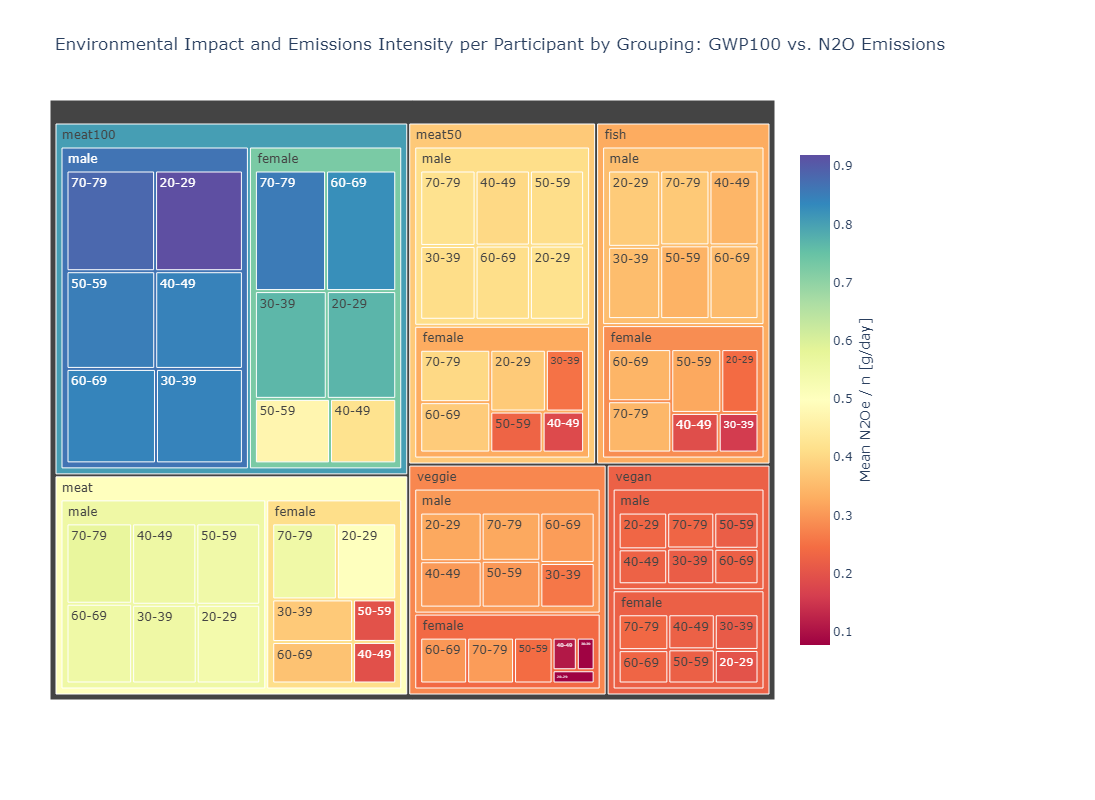

In [343]:
fig = px.treemap(data_frame=df, 
                 path=['diet_group', 'sex', 'age_group'], 
                 values='mean_gwp100_co2e_per_n', 
                 color='n2o_per_n', 
                 color_continuous_scale='spectral', 
                 title='Environmental Impact and Emissions Intensity per Participant by Grouping: GWP100 vs. N2O Emissions',
                 height=800,
                 width=1200)

fig.update_coloraxes(colorbar_title='Mean N2Oe / n [g/day]', 
                     colorbar=dict(len=0.85, title=dict(side='right'), y=0.5))

fig.update_layout(margin=dict(t=100, r=320, b=100, l=50))
fig.show()

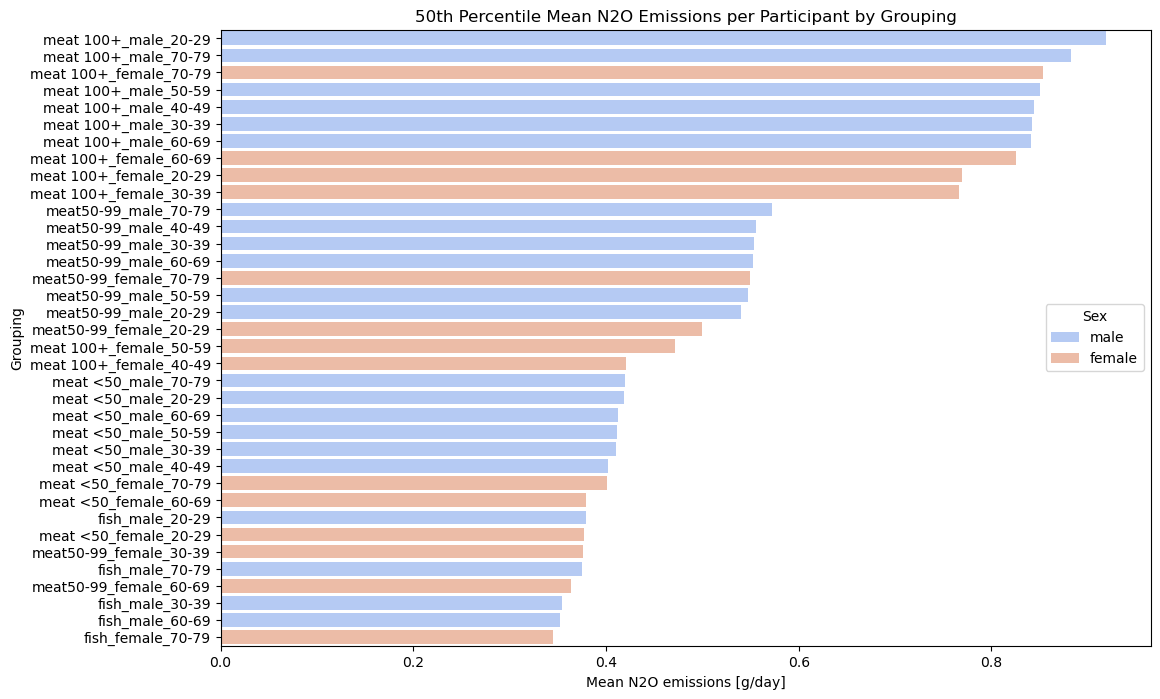

In [355]:
# convert dictionary to dataframe
mean_ghgs_n2o_df = pd.DataFrame(list(mean_ghgs_n2o_per_participant_by_group.items()), columns=['grouping', 'N2O_per_n'])

# merge n2o_df with original df
mean_ghgs_n2o_df = pd.merge(mean_ghgs_n2o_df, df[['grouping', 'sex']], on='grouping')

mean_ghgs_n2o_df_sorted = mean_ghgs_n2o_df.sort_values(by='N2O_per_n', ascending=False)
top_50_percent_rows = int(len(mean_ghgs_n2o_df_sorted) * 0.5)
top_50_percent_df = mean_ghgs_n2o_df_sorted.head(top_50_percent_rows)

plt.figure(figsize=(12, 8))
sns.barplot(x='N2O_per_n', y='grouping', data=top_50_percent_df, hue='sex', palette='coolwarm', dodge=False)
plt.xlabel('Mean N2O emissions [g/day]')
plt.ylabel('Grouping')
plt.title('50th Percentile Mean N2O Emissions per Participant by Grouping')
plt.legend(title='Sex')
plt.show()

#for i, group in enumerate(top_50_percent_df['grouping']):
    #if '70-79' in group:        
        #ax.text(top_50_percent_df.loc[top_50_percent_df['grouping'] == group, 'n2o_per_n'].values[0], i, group, 
                #color='red', weight='bold')

#plt.show()

In [336]:
male_entries_df = top_50_percent_df[top_50_percent_df['sex'] == 'male']

# number of unique male entries
num_male_unique_entries = male_entries_df['grouping'].nunique()
print("Number of male entries in 50th percentile:", num_male_unique_entries)

num_total_unique_entries = top_50_percent_df['grouping'].nunique()
percentage_male_unique_entries = (num_male_unique_entries / num_total_unique_entries) * 100

print("\nPercentage of male entries in 50th percentile:", f"{percentage_male_unique_entries:.0f} %")

Number of male entries in 50th percentile: 22

Percentage of male entries in 50th percentile: 61 %
